## Overview: Nobel Prize Data Analysis Project

The Nobel Prize, established in 1901, is one of the most esteemed international accolades, recognizing outstanding contributions to humanity across various disciplines, including chemistry, literature, physics, physiology or medicine, economics, and peace. Each recipient not only earns a prestigious gold medal bearing the image of Alfred Nobel (1833–1896) but also gains worldwide recognition and substantial prize money.

For this project, I analyzed a dataset from the Nobel Prize API, which includes information about all laureates from 1901 to 2023. By diving into this rich dataset, I sought to uncover interesting patterns and insights into the history of Nobel Prize winners.

The analysis aims to answer several key questions, such as:

1. What are the most common attributes of Nobel laureates (e.g., gender, country of birth)?
2. Which decade or category saw notable changes in gender representation?
3. Who are the repeat winners, and what makes their contributions unique?
4. How has the representation of US-born laureates evolved over time?
5. This notebook not only showcases the findings from my exploration but also serves as an example of how data analysis techniques can be used to answer complex historical and societal questions. The project is structured to encourage further exploration of this fascinating dataset.

Feel free to view the code, visualizations, and results in my GitHub repository. I'm open to feedback and suggestions, and I hope this inspires more data enthusiasts to explore historical datasets like this one!

In [5]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
nobel_df = pd.read_csv('nobel_price.csv')
nobel_df.head()

,index,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"for his work on serum therapy, especially its ...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [11]:
# Question 1: Most commonly awarded gender and birth country

# Analyze the most commonly awarded gender
top_gender = nobel_df['sex'].value_counts().idxmax()
print(top_gender)
# Analyze the most commonly awarded birth country
top_country = nobel_df['birth_country'].value_counts().idxmax()
print(top_country)

Male
United States of America


In [8]:
# Convert year to decade
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

In [9]:
nobel_df[nobel_df['birth_country'] == 'United States of America'].groupby('decade').size()

decade
1900     1
1910     3
1920     4
1930    14
1940    13
1950    21
1960    21
1970    33
1980    31
1990    42
2000    52
2010    38
2020    18
dtype: int64

In [10]:
nobel_df.groupby('decade').size()

decade
1900     57
1910     40
1920     54
1930     56
1940     43
1950     72
1960     79
1970    104
1980     97
1990    104
2000    123
2010    121
2020     50
dtype: int64

In [12]:
# Question 2: Decade with the highest ratio of US-born Nobel Prize winners to total winners
us_ratio = (
    nobel_df[nobel_df['birth_country'] == 'United States of America']
    .groupby('decade')
    .size()
    / nobel_df.groupby('decade').size()
)
max_decade_usa = us_ratio.idxmax()
max_decade_usa

2000

In [13]:
nobel_df[nobel_df['sex'] == 'Female'].groupby(['decade', 'category']).size()

decade  category  
1900    Literature    1
        Peace         1
        Physics       1
1910    Chemistry     1
1920    Literature    2
1930    Chemistry     1
        Literature    1
        Peace         1
1940    Literature    1
        Medicine      1
        Peace         1
1960    Chemistry     1
        Literature    1
        Physics       1
1970    Medicine      1
        Peace         3
1980    Medicine      3
        Peace         1
1990    Literature    3
        Medicine      1
        Peace         3
2000    Chemistry     1
        Economics     1
        Literature    3
        Medicine      4
        Peace         2
2010    Chemistry     1
        Economics     1
        Literature    3
        Medicine      2
        Peace         5
        Physics       1
2020    Chemistry     3
        Economics     1
        Literature    2
        Medicine      1
        Peace         2
        Physics       2
dtype: int64

In [14]:
nobel_df.groupby(['decade', 'category']).size()

decade  category  
1900    Chemistry      9
        Literature    10
        Medicine      11
        Peace         14
        Physics       13
                      ..
2020    Economics      9
        Literature     4
        Medicine       8
        Peace          7
        Physics       12
Length: 72, dtype: int64

In [15]:
female_ratio = (
    nobel_df[nobel_df['sex'] == 'Female']
    .groupby(['decade', 'category'])
    .size()
    / nobel_df.groupby(['decade', 'category']).size()
)

female_ratio

decade  category  
1900    Chemistry          NaN
        Literature    0.100000
        Medicine           NaN
        Peace         0.071429
        Physics       0.076923
                        ...   
2020    Economics     0.111111
        Literature    0.500000
        Medicine      0.125000
        Peace         0.285714
        Physics       0.166667
Length: 72, dtype: float64

In [16]:
max_female_combination = female_ratio.idxmax()
max_female_combination

(2020, 'Literature')

In [17]:
# Question 3: Decade and category with the highest proportion of female laureates
female_ratio = (
    nobel_df[nobel_df['sex'] == 'Female']
    .groupby(['decade', 'category'])
    .size()
    / nobel_df.groupby(['decade', 'category']).size()
)
max_female_combination = female_ratio.idxmax()
max_female_dict = {max_female_combination[0]: max_female_combination[1]}
max_female_dict

{2020: 'Literature'}

In [18]:
# Question 4: First woman to receive a Nobel Prize and the category
first_female = nobel_df[nobel_df['sex'] == 'Female'].sort_values('year').iloc[0]
print(first_female)
first_woman_name = first_female['full_name']
print(first_woman_name)
first_woman_category = first_female['category']
print(first_woman_category)

index                                                                  19
year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              in recognition of the extraordinary services t...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                     

In [19]:
nobel_df['full_name'].value_counts()

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: count, Length: 993, dtype: 

In [20]:
nobel_df['full_name'].value_counts().loc[lambda x: x > 1].index.tolist()

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

In [21]:
# Question 5: Individuals or organizations with more than one Nobel Prize
repeat_list = (
    nobel_df['full_name']
    .value_counts()
    .loc[lambda x: x > 1]
    .index.tolist()
)

repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

In [22]:
# Output results
print("Most commonly awarded gender:", top_gender)
print("Most commonly awarded birth country:", top_country)
print("Decade with highest ratio of US-born winners:", max_decade_usa)
print("Decade and category with highest proportion of female laureates:", max_female_dict)
print("First woman to receive a Nobel Prize:", first_woman_name)
print("Category of first woman laureate:", first_woman_category)
print("Individuals/organizations with more than one Nobel Prize:", repeat_list)

Most commonly awarded gender: Male
Most commonly awarded birth country: United States of America
Decade with highest ratio of US-born winners: 2000
Decade and category with highest proportion of female laureates: {2020: 'Literature'}
First woman to receive a Nobel Prize: Marie Curie, née Sklodowska
Category of first woman laureate: Physics
Individuals/organizations with more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


## Gender Distribution of Nobel Prize Winners

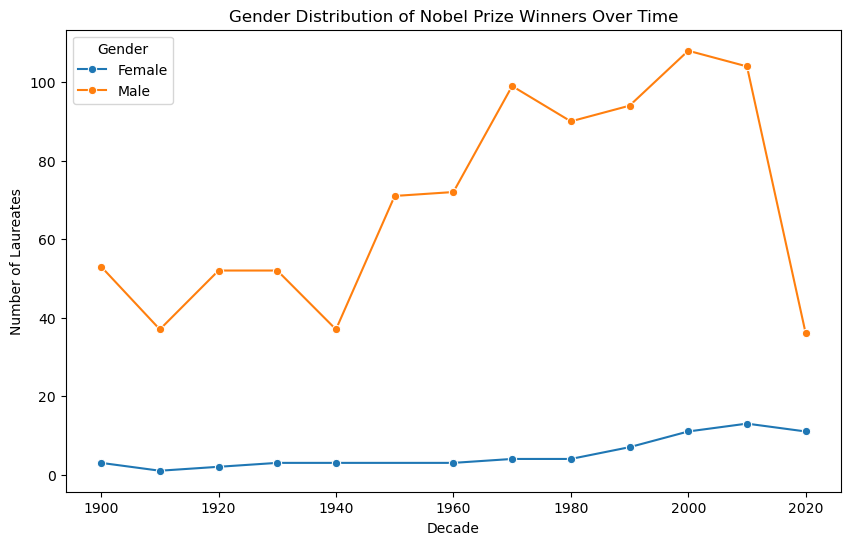

In [27]:
import matplotlib.pyplot as plt

# Adding a 'decade' column
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# Group by decade and gender
gender_counts = nobel_df.groupby(['decade', 'sex']).size().reset_index(name='count')

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_counts, x='decade', y='count', hue='sex', marker='o')
plt.title('Gender Distribution of Nobel Prize Winners Over Time')
plt.xlabel('Decade')
plt.ylabel('Number of Laureates')
plt.legend(title='Gender')
plt.savefig('Gender Distribution of Nobel Prize Winners Over Time.jpg')
plt.show()


The line chart depicts the gender distribution of Nobel Prize winners over time, broken down by decade. Here's what can be inferred:

__Male Dominance:__

Male laureates have consistently outnumbered female laureates throughout the history of the Nobel Prize.
Slow Increase in Female Representation:

There is a gradual upward trend in the number of female laureates over the decades, though the increase is relatively small compared to males.
Recent Decline in Total Winners:

The sharp decline in the number of male laureates in the most recent decade (2020s) may indicate incomplete data or a decrease in the total awards given so far in this decade.
The female line, however, remains steady or slightly increases, suggesting a slow but ongoing improvement in gender balance.
Period of Stability:

**From around 1920 to 1960**, there appears to be relatively little change in the number of winners for both genders.
Observations:
Efforts to improve gender equity in Nobel Prizes seem to be reflected, albeit modestly, in the increasing representation of female laureates.
The recent decade (2020s) data might not be fully comparable with previous decades due to its shorter timespan or delayed awards.

## Category-Wise Laureate Count

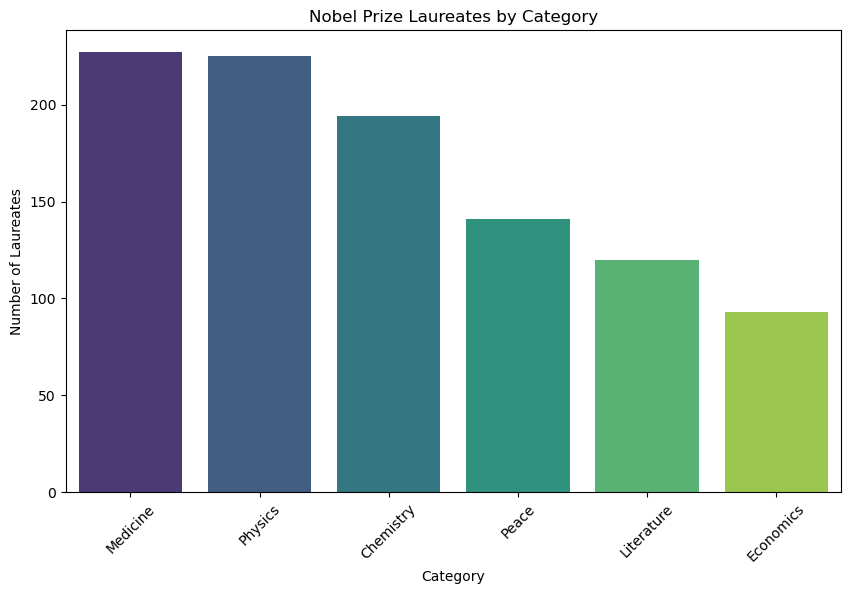

In [31]:
# Count laureates by category
category_counts = nobel_df['category'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis')
plt.title('Nobel Prize Laureates by Category')
plt.xlabel('Category')
plt.ylabel('Number of Laureates')
plt.xticks(rotation=45)
plt.savefig('Nobel Prize Laureates by Category.jpg')
plt.show()


**Nobel Prize Laureates by Category:**

Medicine and Physics have the highest number of Nobel Laureates, with both categories surpassing 200 recipients.

Economics has the fewest number of laureates among all categories, indicating it may either have fewer awards overall or a more recent introduction.
Categories such as Peace and Literature are less represented compared to the scientific fields like Chemistry, Medicine, and Physics.

## Country-Wise Birth Distribution

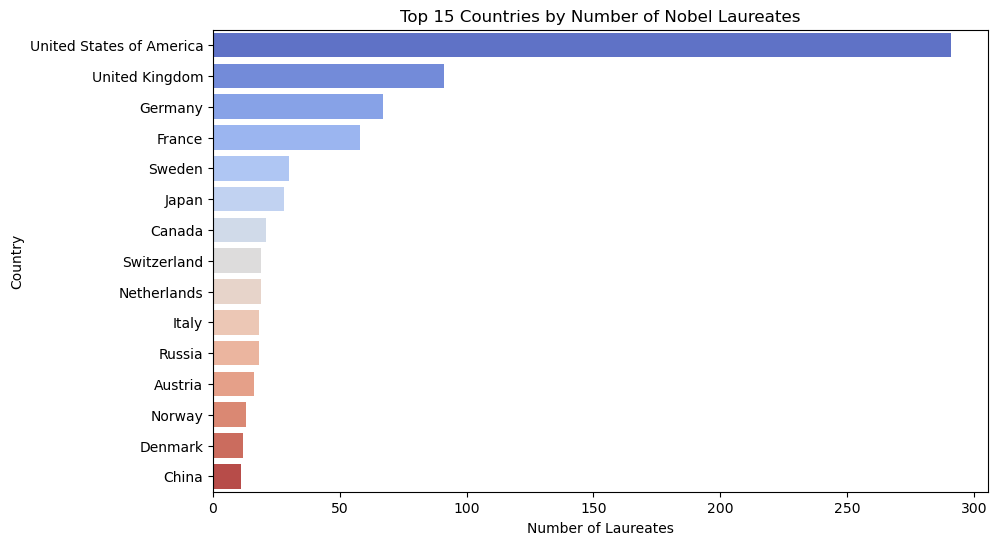

In [39]:
# Count laureates by birth country
country_counts = nobel_df['birth_country'].value_counts().head(15)

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, hue=country_counts.index, palette='coolwarm')
plt.title('Top 15 Countries by Number of Nobel Laureates')
plt.xlabel('Number of Laureates')
plt.ylabel('Country')
plt.savefig('Top 15 Countries by Number of Nobel Laureates.jpg')
plt.show()


**Top 15 Countries by Number of Nobel Laureates:**

The United States dominates the list with the highest number of Nobel Laureates, significantly outpacing other countries.
The United Kingdom and Germany follow, but their counts are much lower compared to the United States.
European countries (e.g., France, Sweden, Switzerland) are prominently featured, showcasing the region's historical contributions to the Nobel categories.

China is present at the bottom of the list, reflecting its growing but still limited representation in Nobel recognitions.
The graph suggests a strong correlation between developed nations and the number of laureates, highlighting the influence of resources, institutions, and historical developments in producing Nobel Prize winners.

## Age Distribution of Winners

In [42]:
# Check which rows contain invalid birth dates
invalid_dates = nobel_df[~nobel_df['birth_date'].str.match(r"^\d{4}-\d{2}-\d{2}$", na=False)]
invalid_dates

,index,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
24,24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
60,60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910
89,89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1910
200,200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930
215,215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940
237,237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940
238,238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940
283,283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950
348,348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
349,349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960


In [44]:
# Replace invalid dates with NaT
nobel_df['birth_date'] = pd.to_datetime(
    nobel_df['birth_date'], errors='coerce', format='%Y-%m-%d'
)

# Rows with invalid dates will now have NaT in 'birth_date'


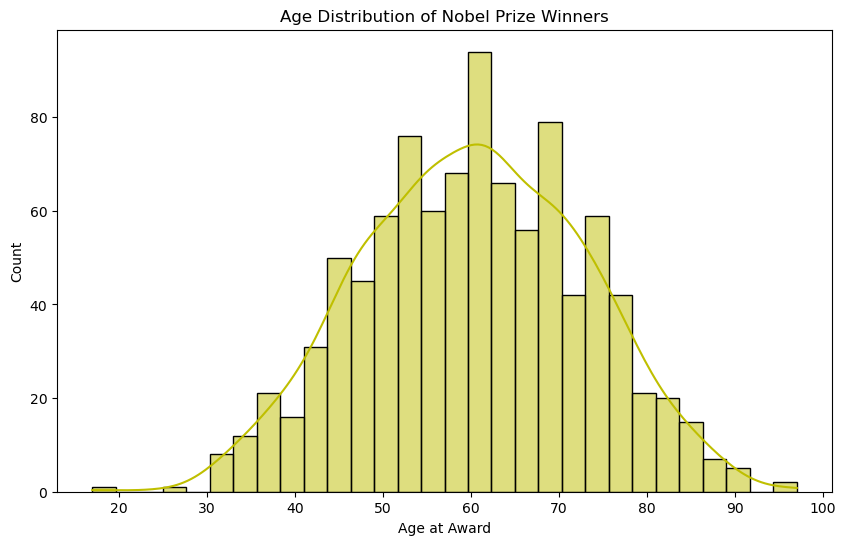

In [50]:
# Calculate the age of laureates when they received the prize
nobel_df['birth_date'] = pd.to_datetime(nobel_df['birth_date'])
nobel_df['age_at_award'] = nobel_df['year'] - nobel_df['birth_date'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(nobel_df['age_at_award'].dropna(), bins=30, kde=True, color='y')
plt.title('Age Distribution of Nobel Prize Winners')
plt.xlabel('Age at Award')
plt.ylabel('Count')
plt.savefig('Age Distribution of Nobel Prize Winners.jpg')
plt.show()


## Age Distribution of Nobel Prize Winners

The peak occurs between the ages of 55 and 60, indicating that most Nobel laureates received their prizes during this age range.

There are very few laureates under 30 or over 90, showing that the Nobel Prize is typically awarded to individuals in mid to late stages of their careers, possibly due to the time required to make significant contributions in their fields.

## Female Laureates by Category

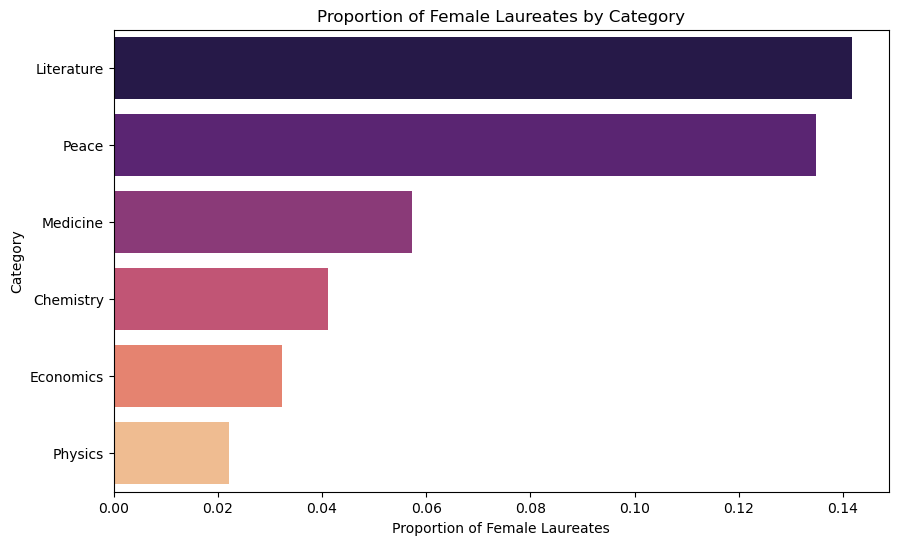

In [54]:
# Calculate the proportion of female laureates by category
female_counts = nobel_df[nobel_df['sex'] == 'Female'].groupby('category').size()
total_counts = nobel_df.groupby('category').size()
female_proportion = (female_counts / total_counts).sort_values(ascending=False)

# Plot the proportions
plt.figure(figsize=(10, 6))
sns.barplot(x=female_proportion.values, y=female_proportion.index, hue=female_proportion.index, palette='magma')
plt.title('Proportion of Female Laureates by Category')
plt.xlabel('Proportion of Female Laureates')
plt.ylabel('Category')
plt.savefig('Proportion of Female Laureates by Category.jpg')
plt.show()


## Proportion of Female Laureates by Category
Female representation among Nobel laureates is highly category-dependent.

Categories like Literature and Peace have the highest proportions of female winners, with Literature being the highest overall.
Medicine also shows moderate female representation, likely due to increasing participation of women in life sciences over time.
Physics and Economics have the lowest female representation, reflecting historical and ongoing gender disparities in these fields.

The data underscores the need for greater efforts toward gender diversity, particularly in the sciences and economics.